In [1]:
import numpy as np, basic, prjlib, plottools as pl
from matplotlib.pyplot import *

In [2]:
Tcmb = 2.72e6
ntype = 'base_roll50'

In [3]:
p = {}
TT, EE, BB, TN, EN, BN = {}, {}, {}, {}, {}, {}
for t, lmax in [('sa',2048),('la',4096)]:
    for nu in ['93','145','225','com']:
        p[t+nu] = prjlib.analysis_init(t=t,freq=nu,ntype=ntype)
        print('loading from',p[t+nu].fcmb.scl['o'])
        l, TT[t+nu], EE[t+nu], BB[t+nu] = np.loadtxt(p[t+nu].fcmb.scl['s'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
        l, TN[t+nu], EN[t+nu], BN[t+nu] = np.loadtxt(p[t+nu].fcmb.scl['n'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
pid = prjlib.analysis_init(t='id',ntype='cv')
l, TT['id'], EE['id'], BB['id'] = np.loadtxt(pid.fcmb.scl['o'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
L = np.linspace(0,2048,2049)
s = l*(l+1.)*Tcmb**2/2./np.pi
lTT = p['lacom'].lTT

loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa93_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa145_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa225_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sacom_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la93_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la145_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la225_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/lacom_base_roll50_mv3_a5.0deg_none_o.dat


In [4]:
inl = prjlib.inv_nltt(['93','145','225'],lmax,roll=50,year=3.*3.2e7)

la 93
la 145
la 225


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


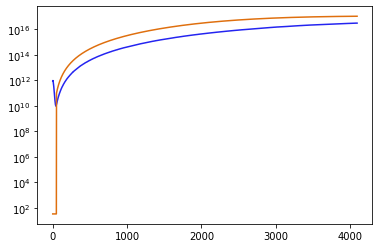

In [8]:
yscale("log")
plot(1./TN["la225"])
plot(inl[0,2,:])